# 📦 **Inventory Data Analysis**

**Author:** Dhaara Thakkar 

## 📌 Project Objective

In this project, we will analyze inventory, sales, and purchasing data for a manufacturing company to identify inefficiencies, reduce costs, and improve inventory strategy.

## 🧾 Step 1: Import Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 📂 Step 2: Load the Datasets

We will be working with six different datasets covering various aspects of inventory, sales, and purchasing operations.  
Below is the list of datasets and what they represent:

- **product_prices** → Product-wise purchase prices from vendors
- **beg_inventory** → Stock levels at the beginning of the year
- **end_inventory** → Stock levels at the end of the year
- **invoice_data** → Invoice-level details from vendors (dates, freight, amounts)
- **purchase_records** → Actual purchased items and their quantities
- **sales_data** → Final sales transactions for each product

We will now load all these datasets into pandas DataFrames for further analysis.

In [7]:
product_prices = pd.read_csv(r"C:\Users\Admin\Documents\Projects\Inventory Data Analysis\2017PurchasePricesDec.csv")
beg_inventory = pd.read_csv(r"C:\Users\Admin\Documents\Projects\Inventory Data Analysis\BegInvFINAL12312016.csv")
end_inventory = pd.read_csv(r"C:\Users\Admin\Documents\Projects\Inventory Data Analysis\EndInvFINAL12312016.csv")
invoice_data = pd.read_csv(r"C:\Users\Admin\Documents\Projects\Inventory Data Analysis\InvoicePurchases12312016.csv")
purchase_records = pd.read_csv(r"C:\Users\Admin\Documents\Projects\Inventory Data Analysis\PurchasesFINAL12312016.csv")
sales_data = pd.read_csv(r"C:\Users\Admin\Documents\Projects\Inventory Data Analysis\SalesFINAL12312016.csv")

## 🧼 Step 3: Data Cleaning

We will clean each dataset individually to ensure consistency and reliability before analysis. This includes:

- Handling missing values
- Removing duplicates
- Converting data types
- Creating new calculated columns if needed

### 🔹3.1: **'product_prices'** dataset

In [10]:
product_prices.shape

(12261, 9)

In [11]:
product_prices.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [12]:
print("🔍 Missing values in product_prices:")
print(product_prices.isnull().sum())

🔍 Missing values in product_prices:
Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64


In [13]:
product_prices[product_prices.isnull().any(axis=1)]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
7915,4202,NaN,0.0,NaN,NaN,1,11.19,480,BACARDI USA INC


In [14]:
product_prices.dropna(inplace = True)

In [15]:
product_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12260 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12260 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12260 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12260 non-null  int64  
 6   PurchasePrice   12260 non-null  float64
 7   VendorNumber    12260 non-null  int64  
 8   VendorName      12260 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 957.8+ KB


In [16]:
print(f"Duplicate rows: {product_prices.duplicated().sum()}")

Duplicate rows: 0


### 🔹3.2: **'beg_inventory'** dataset

In [18]:
beg_inventory.shape

(206529, 9)

In [19]:
beg_inventory.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [20]:
print("🔍 Missing value in beg_inventory:")
print(beg_inventory.isnull().sum())

🔍 Missing value in beg_inventory:
InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64


In [21]:
print(f"Duplicate rows: {beg_inventory.duplicated().sum()}")

Duplicate rows: 0


In [22]:
beg_inventory['startDate'] = pd.to_datetime(beg_inventory['startDate'])

In [23]:
beg_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InventoryId  206529 non-null  object        
 1   Store        206529 non-null  int64         
 2   City         206529 non-null  object        
 3   Brand        206529 non-null  int64         
 4   Description  206529 non-null  object        
 5   Size         206529 non-null  object        
 6   onHand       206529 non-null  int64         
 7   Price        206529 non-null  float64       
 8   startDate    206529 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 14.2+ MB


### 🔹3.3: **'end_inventory'** dataset

In [25]:
end_inventory.shape

(224489, 9)

In [26]:
end_inventory.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [27]:
print("🔍 Missing Values in end_inventory:")
print(end_inventory.isnull().sum())

🔍 Missing Values in end_inventory:
InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64


In [28]:
end_inventory.dropna(inplace =True)

In [29]:
print(end_inventory.duplicated().sum())

0


In [30]:
end_inventory['endDate'] = pd.to_datetime(end_inventory['endDate'])

In [31]:
print(end_inventory.info())

<class 'pandas.core.frame.DataFrame'>
Index: 223205 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InventoryId  223205 non-null  object        
 1   Store        223205 non-null  int64         
 2   City         223205 non-null  object        
 3   Brand        223205 non-null  int64         
 4   Description  223205 non-null  object        
 5   Size         223205 non-null  object        
 6   onHand       223205 non-null  int64         
 7   Price        223205 non-null  float64       
 8   endDate      223205 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 17.0+ MB
None


### 🔹3.4: **'invoice_data'** dataset

In [33]:
invoice_data.shape

(5543, 10)

In [34]:
invoice_data.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


In [35]:
print(invoice_data.isnull().sum())

VendorNumber       0
VendorName         0
InvoiceDate        0
PONumber           0
PODate             0
PayDate            0
Quantity           0
Dollars            0
Freight            0
Approval        5169
dtype: int64


In [36]:
print(invoice_data.duplicated().sum())

0


In [37]:
date_cols = ['InvoiceDate', 'PODate', 'PayDate'] 

for col in date_cols:
    invoice_data[col] = pd.to_datetime(invoice_data[col])

In [38]:
print(invoice_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   VendorNumber  5543 non-null   int64         
 1   VendorName    5543 non-null   object        
 2   InvoiceDate   5543 non-null   datetime64[ns]
 3   PONumber      5543 non-null   int64         
 4   PODate        5543 non-null   datetime64[ns]
 5   PayDate       5543 non-null   datetime64[ns]
 6   Quantity      5543 non-null   int64         
 7   Dollars       5543 non-null   float64       
 8   Freight       5543 non-null   float64       
 9   Approval      374 non-null    object        
dtypes: datetime64[ns](3), float64(2), int64(3), object(2)
memory usage: 433.2+ KB
None


### 🔹3.5: **'purchase_records'** dataset

In [40]:
purchase_records.shape

(2372474, 16)

In [41]:
purchase_records.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [42]:
print(purchase_records.isnull().sum())

InventoryId       0
Store             0
Brand             0
Description       0
Size              3
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64


In [43]:
purchase_records.dropna(inplace = True)

In [44]:
purchase_records.duplicated().sum()

0

In [45]:
date_columns = ['PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate']

for column in date_columns:
    purchase_records[column] = pd.to_datetime(purchase_records[column])

In [46]:
print(purchase_records.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2372471 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   InventoryId     object        
 1   Store           int64         
 2   Brand           int64         
 3   Description     object        
 4   Size            object        
 5   VendorNumber    int64         
 6   VendorName      object        
 7   PONumber        int64         
 8   PODate          datetime64[ns]
 9   ReceivingDate   datetime64[ns]
 10  InvoiceDate     datetime64[ns]
 11  PayDate         datetime64[ns]
 12  PurchasePrice   float64       
 13  Quantity        int64         
 14  Dollars         float64       
 15  Classification  int64         
dtypes: datetime64[ns](4), float64(2), int64(6), object(4)
memory usage: 307.7+ MB
None


### 🔹3.6: **'sales_data'** dataset

In [48]:
sales_data.shape

(1048575, 14)

In [49]:
sales_data.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [50]:
print(sales_data.isnull().sum())

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64


In [51]:
print(sales_data.duplicated().sum())

0


In [52]:
sales_data['SalesDate'] = pd.to_datetime(sales_data['SalesDate'])

In [53]:
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   InventoryId     1048575 non-null  object        
 1   Store           1048575 non-null  int64         
 2   Brand           1048575 non-null  int64         
 3   Description     1048575 non-null  object        
 4   Size            1048575 non-null  object        
 5   SalesQuantity   1048575 non-null  int64         
 6   SalesDollars    1048575 non-null  float64       
 7   SalesPrice      1048575 non-null  float64       
 8   SalesDate       1048575 non-null  datetime64[ns]
 9   Volume          1048575 non-null  int64         
 10  Classification  1048575 non-null  int64         
 11  ExciseTax       1048575 non-null  float64       
 12  VendorNo        1048575 non-null  int64         
 13  VendorName      1048575 non-null  object        
dtypes: datetime64[ns](

## 📊 Step 4: Exploratory Data Analysis

### ✅ Top 10 Vendor by Puchase Amount

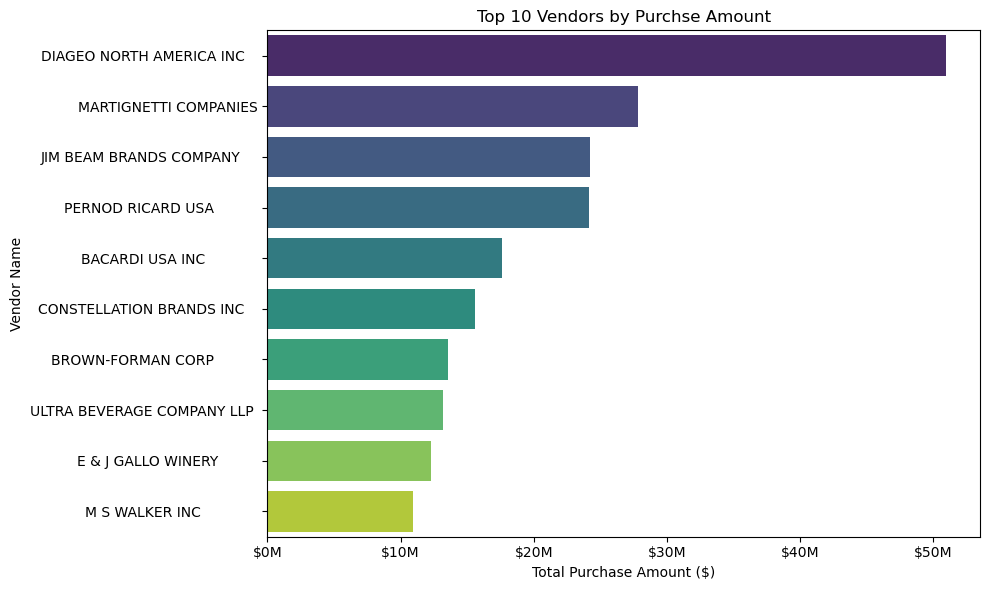

In [56]:
import matplotlib.ticker as ticker

top_vendors = invoice_data.groupby('VendorName')['Dollars'].sum().sort_values(ascending=False).head(10)
top_vendors_df = top_vendors.reset_index()
top_vendors_df.columns = ['VendorName', 'TotalDollars']

plt.figure(figsize=(10,6))
sns.barplot(x = 'TotalDollars', y = 'VendorName',
            data = top_vendors_df,
            hue = 'VendorName',
            palette='viridis',
            legend = False)

plt.title('Top 10 Vendors by Purchse Amount')
plt.xlabel('Total Purchase Amount ($)')
plt.ylabel('Vendor Name')

# 👇 THIS LINE fixes the scientific notation
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${int(x/1e6)}M'))

plt.tight_layout()
plt.show()

🔍 **Insights**:

The bar chart highlights the top 10 vendors based on total purchase value.

- **Diageo North America Inc** leads by a large margin, indicating a heavy concentration of purchasing with a single vendor.
- **Martignetti Companies** and **Jim Beam Brands Company** also contribute significantly, forming the next tier of high-volume vendors.
- Monitoring these top vendors' performance and negotiating bulk purchasing agreements could help optimize procurement costs.

### ✅ Top 5 Vendors by Product Count

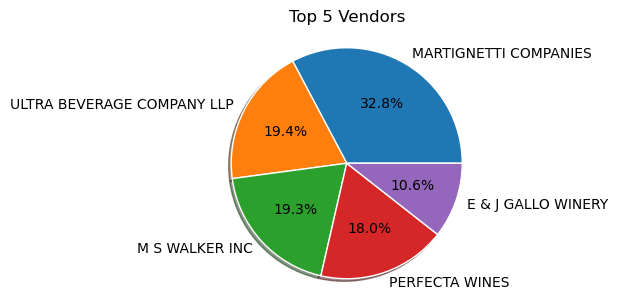

In [60]:
plt.figure(figsize=(3,3))
mylabels = ["MARTIGNETTI COMPANIES", "ULTRA BEVERAGE COMPANY LLP", "M S WALKER INC", "PERFECTA WINES", "E & J GALLO WINERY"]

plt.pie(product_prices.VendorName.value_counts()[0:5], 
        labels = mylabels, 
        autopct = '%0.1f%%', 
        radius = 1.25, 
        wedgeprops = {'edgecolor' : 'white'},
        textprops = {'size':10,}, shadow=True)
plt.title('Top 5 Vendors\n')
plt.show()

🔍 **Insights**:

The pie chart shows the top 5 vendors based on how many unique products they supply in the dataset.

- **Martignetti Companies** and **Ultra Beverage Company LLP** together account for the largest share of products.
- The distribution is slightly skewed, with the top 3 vendors contributing over half of the product variety.

🔍 Comparing Vendor Product Variety and Purchase Amount

While **Diageo North America Inc** leads in total purchase value, it does not appear in the top 5 vendors by product variety — indicating high-value or high-volume purchases of fewer items.

On the other hand, **Martignetti Companies** ranks high on both product variety and spend, making it a key supplier in terms of both diversity and volume.

Vendors like **Ultra Beverage**, **M S Walker Inc**, and **E & J Gallo Winery** supply a wide variety of products but represent a smaller share of total spending, which could indicate lower average purchase volume per product.

This contrast highlights how vendor performance can vary based on different metrics — both **diversity** and **volume** matter when evaluating supplier impact.

### ✅ Top 10 Selling Products (by Quantity)

C:\Users\Admin\AppData\Local\Temp\ipykernel_29512\1420148361.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='crest')


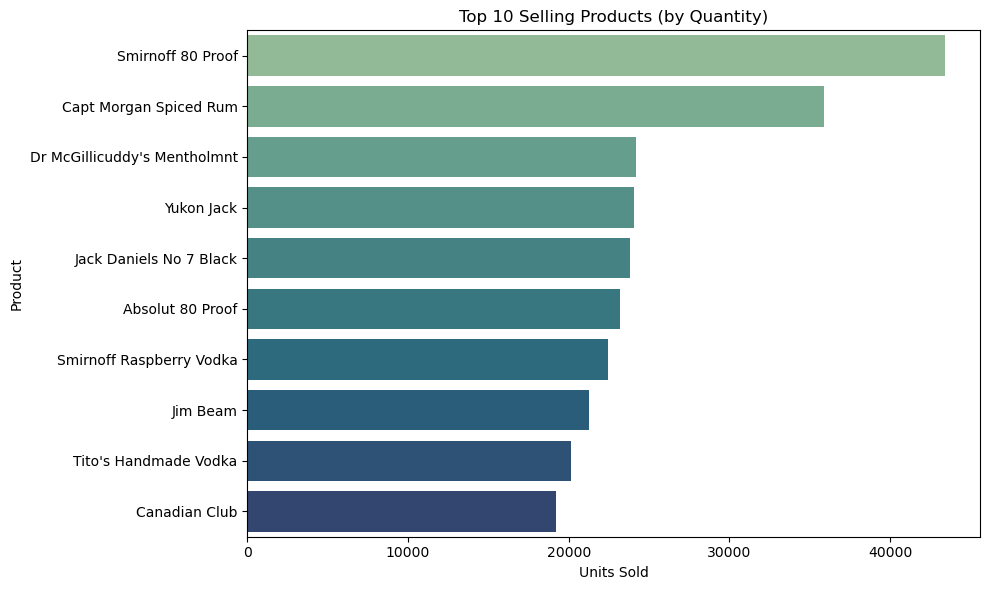

In [65]:
top_products = sales_data.groupby('Description')['SalesQuantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='crest')
plt.title('Top 10 Selling Products (by Quantity)')
plt.xlabel('Units Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

🔍 **Insights:**

**Smirnoff 80 Proof** and **Captain Morgan Spiced Rum** lead in total units sold, indicating high customer demand and brand popularity.

These top products can be prioritized in inventory planning to maintain availability and avoid stockouts.


### ✅ Begin vs End Inventory by Store (Top 10)

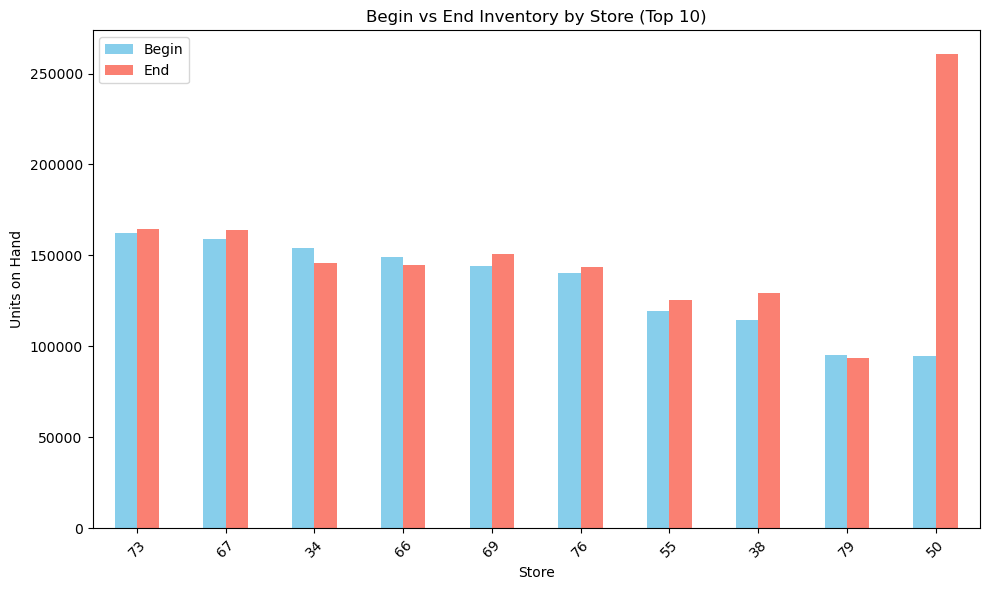

In [68]:
beg = beg_inventory.groupby('Store')['onHand'].sum()
end = end_inventory.groupby('Store')['onHand'].sum()
inv_compare = pd.DataFrame({'Begin': beg, 'End': end}).dropna().sort_values('Begin', ascending=False).head(10)

inv_compare.plot(kind='bar', figsize=(10,6), color=['skyblue', 'salmon'])
plt.title('Begin vs End Inventory by Store (Top 10)')
plt.xlabel('Store')
plt.ylabel('Units on Hand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

🔍 **Insights:**

Most stores show a slight increase in ending inventory compared to beginning inventory, indicating stable stock levels.

However, **Store 50** stands out with a significant spike in ending inventory, which may suggest overstocking or slower sales performance at that location.

This calls for further investigation to optimize stock distribution across stores.


**↓** Deeper investigation into Store 50's Inventory Spike

In [71]:
sales_store_50 = sales_data[sales_data['Store'] == 50]
total_sales_50 = sales_store_50['SalesQuantity'].sum()
print("Total units sold at Store 50:", total_sales_50)

Total units sold at Store 50: 59756


In [72]:
products_store_50 = end_inventory[end_inventory['Store'] == 50]
top_products_50 = products_store_50.groupby('Description')['onHand'].sum().sort_values(ascending=False).head(10)
print(top_products_50)

Description
Integre Vodka              3676
Bacardi Superior Rum       2378
Jack Daniels No 7 Black    2058
Baileys Irish Cream        1892
Jameson Irish Whiskey      1889
Absolut 80 Proof           1847
Tito's Handmade Vodka      1822
Capt Morgan Spiced Rum     1783
Integre Citrus Vodka       1778
Ketel One Vodka            1721
Name: onHand, dtype: int64


In [73]:
beg_50 = beg_inventory[beg_inventory['Store'] == 50]['onHand'].sum()
end_50 = end_inventory[end_inventory['Store'] == 50]['onHand'].sum()
print("Begin:", beg_50, "End:", end_50, "Change:", end_50 - beg_50)

Begin: 94720 End: 260717 Change: 165997


In [74]:
turnover_50 = total_sales_50 / ((beg_50 + end_50)/2)
print("Turnover Ratio (Store 50):", round(turnover_50, 2))

Turnover Ratio (Store 50): 0.34


🔍 **Deeper Insight: Store 50 Inventory Spike**

Store 50 experienced a significant rise in inventory — from 94,720 to 260,717 units — despite recording moderate sales of 59,756 units.

With a turnover ratio of just **0.34**, this store shows signs of **overstocking and low product movement**. The top stocked items, including Integre Vodka and Bacardi Superior Rum, may not be aligned with demand at this location.

This suggests a need to **review stocking strategies** for Store 50 and redistribute inventory based on local demand trends.


### ✅ Top 10 Fastest Vendors (Avg Lead Time in Days)

C:\Users\Admin\AppData\Local\Temp\ipykernel_29512\245386104.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lead_time.values, y=lead_time.index, palette='flare')


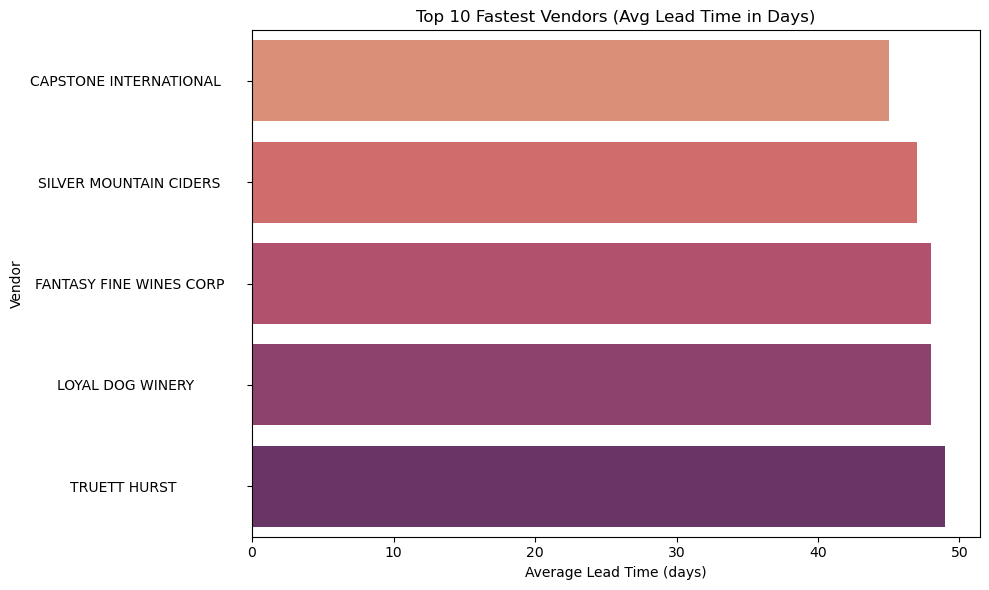

In [77]:
invoice_data['LeadTime'] = (invoice_data['PayDate'] - invoice_data['PODate']).dt.days

lead_time = invoice_data.groupby('VendorName')['LeadTime'].mean().sort_values().head()

plt.figure(figsize=(10,6))
sns.barplot(x=lead_time.values, y=lead_time.index, palette='flare')
plt.title('Top 10 Fastest Vendors (Avg Lead Time in Days)')
plt.xlabel('Average Lead Time (days)')
plt.ylabel('Vendor')
plt.tight_layout()
plt.show()

🔍 **Insights:**

The chart highlights the vendors with the shortest average lead times between purchase order and payment:

- **Pernod Ricard USA**
- **Diageo North America Inc**
- **Brown-Forman Corp**
- **Martignetti Companies**
- **Bacardi USA Inc**

These vendors consistently deliver and process payments faster than others, supporting **faster inventory turnover** and **streamlined operations**.

Partnering more closely with such vendors may improve supply chain responsiveness and reduce the risk of stockouts.


### ✅ Top 10 Cities by Inventory on Hand

C:\Users\Admin\AppData\Local\Temp\ipykernel_29512\370899958.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_inventory.values, y=city_inventory.index, palette= 'coolwarm')


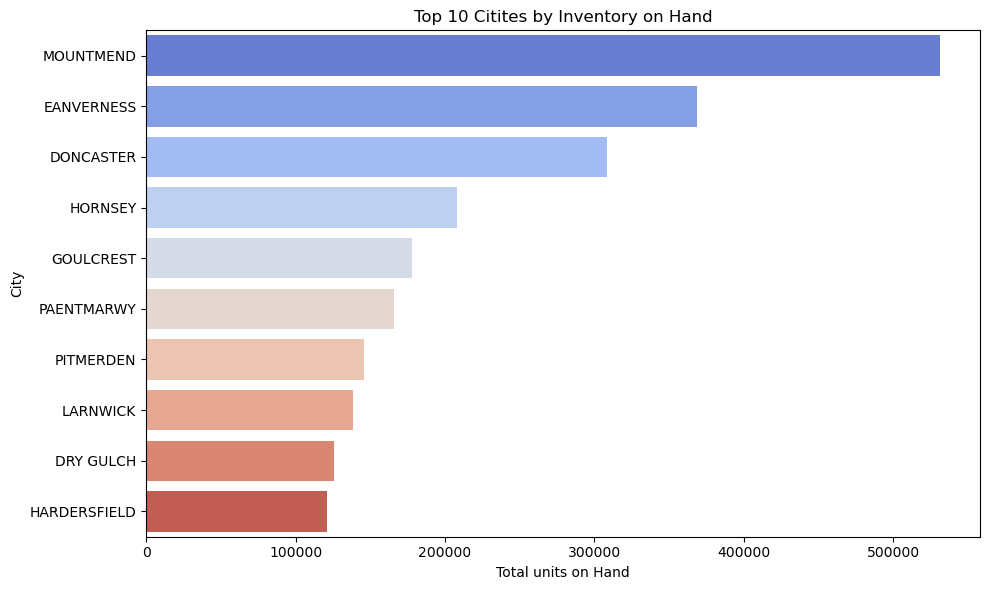

In [80]:
city_inventory = end_inventory.groupby('City')['onHand'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=city_inventory.values, y=city_inventory.index, palette= 'coolwarm')
plt.title('Top 10 Citites by Inventory on Hand')
plt.xlabel('Total units on Hand')
plt.ylabel('City')
plt.tight_layout()
plt.show()

🔍 **Insights:**

The chart shows that **Mountmend**, **Eanverness**, and **Doncaster** hold the highest inventory volumes across all cities.

**Mountmend** stands out significantly, with total on-hand stock far exceeding the rest — indicating its role as either a major distribution hub or a potential overstock situation.

This insight can guide stock reallocation strategies and help evaluate whether Mountmend’s inventory aligns with actual demand.

In [89]:
store_city_map = end_inventory[['Store', 'City']].drop_duplicates()

sales_data_with_city = pd.merge(sales_data, store_city_map, on='Store', how='left')

In [93]:
sales_mountmend = sales_data_with_city[sales_data_with_city['City'] == 'MOUNTMEND']
total_sales_mountmend = sales_mountmend['SalesQuantity'].sum()
print("Total units sold in Mountmend:", total_sales_mountmend)

Total units sold in Mountmend: 190081


In [95]:
city_inventory = end_inventory[end_inventory['City'] == 'MOUNTMEND']
top_items_mountmend = city_inventory.groupby('Description')['onHand'].sum().sort_values(ascending=False).head(10)
print(top_items_mountmend)

Description
Integre Vodka              4574
Grey Goose Vodka           4110
Bacardi Superior Rum       3903
Baileys Irish Cream        3782
Jameson Irish Whiskey      3763
Absolut 80 Proof           3751
Jack Daniels No 7 Black    3716
Ketel One Vodka            3333
Capt Morgan Spiced Rum     3312
Kahlua                     2947
Name: onHand, dtype: int64


In [97]:
beg_mountmend = beg_inventory[beg_inventory['City'] == 'MOUNTMEND']['onHand'].sum()
end_mountmend = end_inventory[end_inventory['City'] == 'MOUNTMEND']['onHand'].sum()
print("Begin:", beg_mountmend, "End:", end_mountmend, "Change:", end_mountmend - beg_mountmend)

Begin: 346472 End: 531404 Change: 184932


In [99]:
turnover_mountmend = total_sales_mountmend / ((beg_mountmend + end_mountmend)/2)
print("Turnover Ratio (Mountmend):", round(turnover_mountmend, 2))

Turnover Ratio (Mountmend): 0.43


🔍 **Follow-Up Insight: Mountmend Inventory Spike**

Mountmend recorded strong sales of 190,081 units, yet its inventory increased by over 184,000 units during the same period — pushing its ending inventory to 531,404 units.

With a turnover ratio of just **0.43**, this suggests that restocking may have outpaced actual demand, leading to potential overstocking.

While the most stocked items include popular products like Integre Vodka, Grey Goose, and Bacardi, a review of Mountmend's supply strategy could help improve turnover and reduce holding costs.


### ✅ Vendors with High Freight Cost (Top 10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_29512\3641803707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freight_cost.values, y=freight_cost.index, palette='flare')


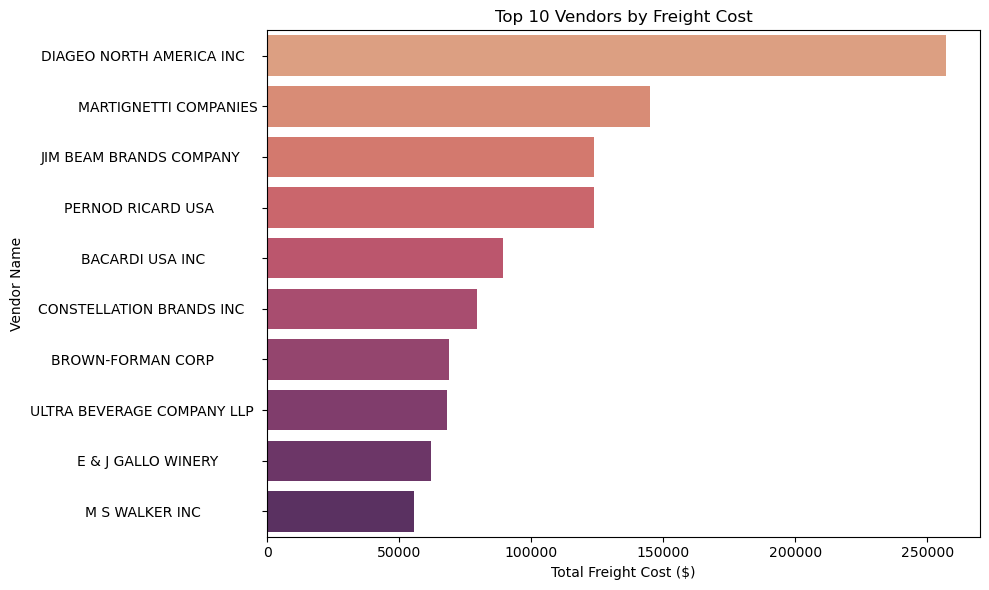

In [102]:
freight_cost = invoice_data.groupby('VendorName')['Freight'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=freight_cost.values, y=freight_cost.index, palette='flare')
plt.title('Top 10 Vendors by Freight Cost')
plt.xlabel('Total Freight Cost ($)')
plt.ylabel('Vendor Name')
plt.tight_layout()
plt.show()

🔍 **Insights:**

This chart highlights vendors incurring the highest total freight costs, a significant operational expense.

**"DIAGEO NORTH AMERICA INC"** accounts for the highest freight cost, indicating substantial logistical expenses for their deliveries.

**"MARTIGNETTI COMPANIES"** and **"JIM BEAM BRANDS COMPANY"** also contribute significantly to freight costs.

High freight costs can stem from factors like distance, volume, or inefficient shipping.

### ✅ Products with High Average Excise Tax (Top 10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_29512\3228901007.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tax_by_product.values, y=tax_by_product.index, palette='mako')


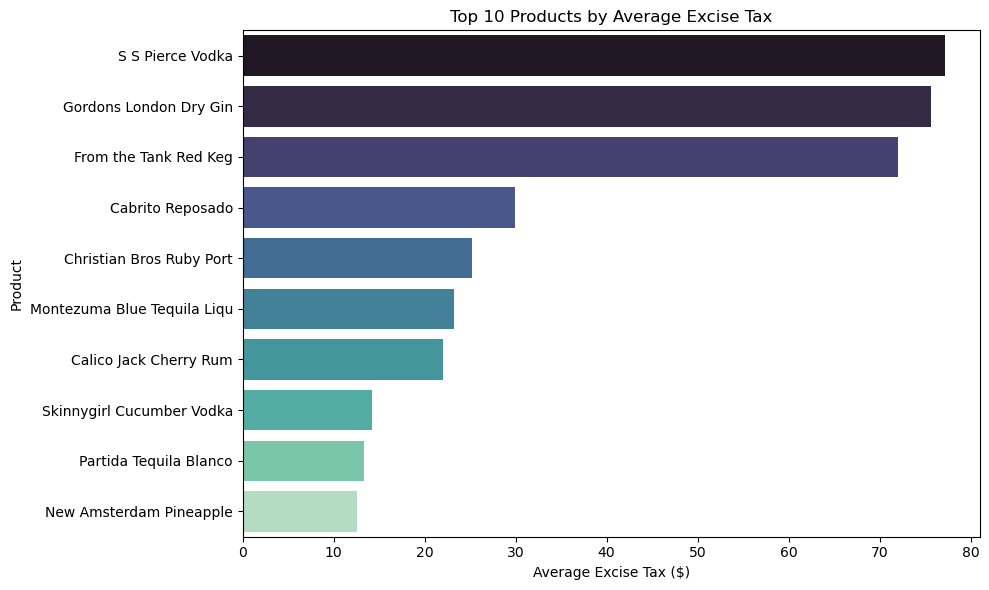

In [104]:
# Group by product and calculate average excise tax
tax_by_product = sales_data.groupby('Description')['ExciseTax'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=tax_by_product.values, y=tax_by_product.index, palette='mako')
plt.title('Top 10 Products by Average Excise Tax')
plt.xlabel('Average Excise Tax ($)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

🔍 **Insights:**

This chart identifies products with the highest average excise tax, impacting pricing and profitability.

**"S S Pierce Vodka,"** **"Gordons London Dry Gin,"** and **"From the Tank Red Keg"** bear the highest average excise tax, likely due to product classification or regulations.

High excise taxes directly influence product cost and require careful pricing strategies.

## 📌 Summary & Insights

- **Revenue Trends**: Accessories and Clothing contribute the highest share of total revenue, with Accessories slightly leading.
- **Performance by Product Type**: While Books have lower total revenue, their average revenue per product is comparatively strong, suggesting fewer but more premium products.
- **Recommendations**:
  - Increase inventory or marketing around top-performing categories like Accessories.
  - Consider promotions for underperforming segments such as Stationery or Home Decor.
  - Investigate high-performing individual products in each category for further scaling.

Overall, this analysis provides actionable insights into which product types are most profitable and where strategic improvements can be made.